In [1]:
import scipy.io as scio
import numpy as np    
import matplotlib.pyplot as plt
import sys
import os
import math
from scipy.misc import imsave
from helper import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

(512, 64)
(512, 64)
(512, 64, 3)


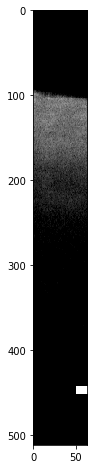

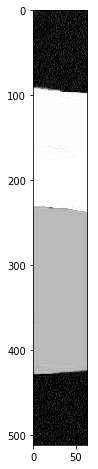

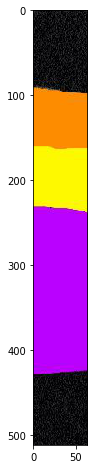

In [3]:
# Setting the directories
import os
cwd = os.getcwd()
main_direct = '/datasets/OCTData/'
directory = cwd + main_direct # main directory

# Extensions
raw_ext = '.tif'
label_ext = '.JPG'

files = {}
for number, filename in enumerate(sorted(os.listdir(directory)), start=1):
    files[number] = filename
    
sub_directory = directory+files[1]+'/'

image = plt.imread(sub_directory+'con_'+files[1]+raw_ext)
# show_main_image(image)
label_image = plt.imread(sub_directory+'label_'+files[1]+label_ext)
# show_main_image(label_image)


# # Testing images saved correctly
test_dir1 = "/home/sim/notebooks/relaynet_pytorch/datasets/OCTData/H1_N01848_LA_1_272/Resized_train/con_H1_N01848_LA_1_272_1.tif"
test_dir2 = "/home/sim/notebooks/relaynet_pytorch/datasets/OCTData/H1_N01848_LA_1_272/Resized_train/label_H1_N01848_LA_1_272_1.JPG"
test_dir3 = "/home/sim/notebooks/relaynet_pytorch/datasets/OCTData/H1_N01848_LA_1_272/Resized_train/label_H1_N01848_LA_1_272_colour_1.JPG"
image1 = plt.imread(test_dir1)
image2 = plt.imread(test_dir2)
image3 = plt.imread(test_dir3)
print(image1.shape)
print(image2.shape)
print(image3.shape)

show_main_image(image1)
show_main_image(image2)
show_main_image(image3)

#### Rename Labelled Images

In [8]:
# Rename files in folder
rename = False

if rename:
    for number, filename in sorted(files.items()):
        sub_directory = directory+files[number]+'/'
        for f in os.listdir(sub_directory):
            ext = f[-4:]
            if ext == label_ext:
                print(sub_directory)
                old_filename = sub_directory+f
                new_filename = sub_directory+'label_'+filename+label_ext
                print("Old Filename: {}, New Filename: {}".format(old_filename, new_filename))
                os.rename(old_filename, new_filename)

#### Create New Directory

In [9]:
make_new_directory = False
if make_new_directory:
    for number, filename in sorted(files.items()):
        sub_directory = directory+files[number]+'/'
        for f in os.listdir(sub_directory):
            ext = f[-4:]
            # If the file isn't an ipynb notebook file and it's the .tif file
            if ext == raw_ext:
                path = sub_directory+'Resized_train'
                os.mkdir(path)

In [10]:
make_segments = False
if make_segments:
    for number, filename in sorted(files.items()):
        sub_directory = directory+files[number]+'/'
        for f in os.listdir(sub_directory):
            ext = f[-4:]
            shape = 2
            if ext == raw_ext or ext == label_ext:
                image_file = sub_directory+f
                image = plt.imread(image_file)
                
                # Crop all images
                if len(image.shape) == 2:
                    height, width = image.shape
                    if width > 600:
                        image = crop_image(image, 0, 600) # Crop all images at 512,600
                elif len(image.shape) == 3:
                    height, width, colour = image.shape
                    if width > 600:
                        image = crop_image(image, 0, 600, colour) # Crop all images at 512,600
                
                # Segment all iamges
                segmented_images = segment_image(image, 0, 600, 64)
                for i in range(len(segmented_images)):
                    if len(image.shape) == 2:
                        save_image(segmented_images[i], sub_directory, f, ext, i, False)
                    elif len(image.shape) == 3:
                         # Pixel loop
        #                 for pix in range(512):
        #                     for p in range(64):
        #                         print(segmented_images[i][pix][p])

        #                 NOTE: WHEN SAVING IMAGES, HAVE TO HAVE CODE FOR COLOUR OF IMAGES TOO! 
        #                 segmented_images[i] = np.transpose(segmented_images[i], (2, 0, 1))
        #                 segmented_images[i].shape = (1,1,512,64)
        #                 show_main_image(image)
                        save_image(segmented_images[i], sub_directory, f, ext, i, True)
                        segmented_images[i] = segmented_images[i][:,:,0] # remove colour for training
                        save_image(segmented_images[i], sub_directory, f, ext, i, False)